In [16]:
%matplotlib inline
from image_processing import *
from matplotlib import pyplot as plt

import os
import sys
import cv2


b_path = base_path()
images = os.listdir("{}/{}".format(b_path, "base_images"))
images

['cana_01.jpg',
 'cana_02.jpg',
 'DSC00676.jpg',
 'DSC00677.JPG',
 'DSC00678.JPG',
 'DSC00679.JPG',
 'DSC00681.JPG']

In [17]:
allowed_extensions = ("jpg", "png", "img", "gif", "bmp")

image_path = [ "{}/base_images/{}".format(b_path, i) for i in images if i.split(".")[1] in allowed_extensions]

image_path

['/Users/joaotrevizoliesteves/projects/python_agriculture_cv/base_images/cana_01.jpg',
 '/Users/joaotrevizoliesteves/projects/python_agriculture_cv/base_images/cana_02.jpg',
 '/Users/joaotrevizoliesteves/projects/python_agriculture_cv/base_images/DSC00676.jpg']

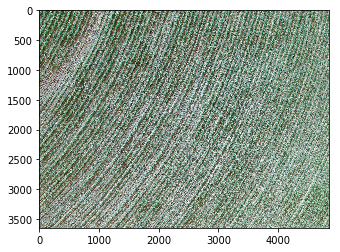

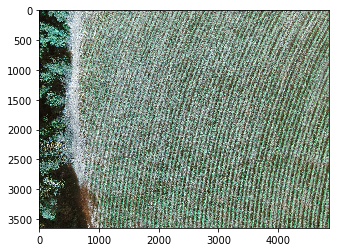

In [18]:
sugarcane_images = []
for i in image_path:
    if i.split("/")[-1].startswith("cana"):
        img = cv2.imread(i)
        sugarcane_images.append(img)
        plt.imshow(img)
        plt.show()    

In [19]:
img

array([[[ 28,  26,  26],
        [ 22,  19,  15],
        [ 26,  21,  12],
        ..., 
        [192, 182, 164],
        [175, 166, 146],
        [149, 138, 118]],

       [[ 25,  23,  22],
        [ 22,  19,  14],
        [ 23,  21,  11],
        ..., 
        [172, 163, 143],
        [147, 136, 116],
        [123, 112,  92]],

       [[ 23,  22,  18],
        [ 21,  18,  13],
        [ 23,  21,  11],
        ..., 
        [142, 128, 109],
        [112,  99,  77],
        [ 99,  85,  63]],

       ..., 
       [[ 10,  16,   5],
        [  2,   7,   0],
        [  0,   4,   0],
        ..., 
        [214, 223, 210],
        [210, 216, 205],
        [214, 220, 209]],

       [[ 13,  23,  11],
        [  6,  14,   3],
        [  5,  15,   3],
        ..., 
        [206, 215, 202],
        [203, 209, 198],
        [202, 208, 197]],

       [[  6,  18,   6],
        [  9,  19,   7],
        [ 18,  28,  16],
        ..., 
        [179, 186, 173],
        [171, 177, 166],
        [165, 171,